<a href="https://colab.research.google.com/github/Pranay3832/Customer_Satisfaction_Prediction/blob/main/Customer_Satisfaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Customer Satisfaction Prediction **

Made By : Pranay Kudale

### Step 1 : Importing Important Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 : Loading the DataSet

In [ ]:
data = pd.read_csv('/content/customer_support_tickets.csv')

# Display the first 5 rows of the dataframe
print("Data Head:")
display(data.head())

# Display information about the dataframe
print("\nData Info:")
display(data.info())

# Display the shape of the dataframe (number of rows and columns)
print("\nData Shape:")
display(data.shape)

Data Head:


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   obje

None


Data Shape:


(8469, 17)

### Step 3 : Data Cleaning

Data Preprocessing and Feature Engineering

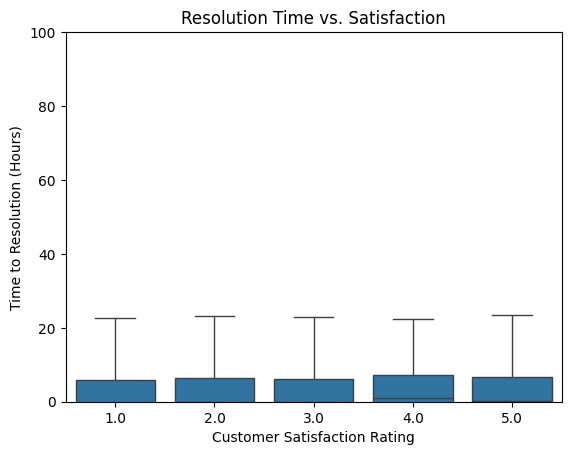

In [ ]:
# Before dropping columns, convert time columns to datetime objects
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Engineer a new feature: Resolution Time in Hours
# We need a ticket creation time, but since it's missing, let's use 'Date of Purchase' as a proxy start.
# A better approach would be to extract the date from 'First Response Time' if it's the earliest timestamp we have.
# Let's assume the ticket was created around the time of the first response for simplicity.
# A more robust feature would be Time to Resolution - Ticket Creation Time.
data['Time to Resolution (Hours)'] = (data['Time to Resolution'] - data['First Response Time']).dt.total_seconds() / 3600

# Now, when cleaning, keep this new feature.
# Also, let's check its relationship with satisfaction.
sns.boxplot(x='Customer Satisfaction Rating', y='Time to Resolution (Hours)', data=data)
plt.ylim(0, 100) # Limit y-axis to see the distribution better
plt.title('Resolution Time vs. Satisfaction')
plt.show()

Handle Missing Data Thoughtfully

In [ ]:
# Check the status of tickets that HAVE a satisfaction rating
print(data[data['Customer Satisfaction Rating'].notna()]['Ticket Status'].value_counts())

Ticket Status
Closed    2769
Name: count, dtype: int64


Add Simple NLP Features

In [ ]:
# Engineer a feature for the length of the ticket subject
data_processed['Ticket Subject Length'] = X['Ticket Subject'].str.len()

# Engineer a feature counting words in the subject
data_processed['Ticket Subject Words'] = X['Ticket Subject'].str.split().str.len()

### Step 4 : Modeling and Evaluation

Gradient Boosting for stronger on tabular data.

In [ ]:
# In your modeling section, add more classifiers to compare
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Create pipelines for each
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))])

# Train and evaluate each one to see which performs best
# Example for XGBoost:
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
print("\\n--- Model Evaluation (XGBoost Classifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\\n", classification_report(y_test, y_pred_xgb))

\n--- Model Evaluation (XGBoost Classifier) ---
Accuracy: 0.182648401826484
Classification Report:\n               precision    recall  f1-score   support

         0.0       0.24      0.20      0.22        40
         1.0       0.11      0.11      0.11        44
         2.0       0.20      0.21      0.21        43
         3.0       0.24      0.26      0.25        43
         4.0       0.13      0.14      0.14        49

    accuracy                           0.18       219
   macro avg       0.19      0.18      0.19       219
weighted avg       0.18      0.18      0.18       219



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:26:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForest - define a smaller parameter grid to run faster
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None]
}

# Use your RF pipeline
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\\n--- Evaluation of Tuned Model ---")
print(classification_report(y_test, y_pred_best))

Best parameters found:  {'classifier__max_depth': None, 'classifier__n_estimators': 100}
\n--- Evaluation of Tuned Model ---
              precision    recall  f1-score   support

         0.0       0.24      0.20      0.22        40
         1.0       0.11      0.11      0.11        44
         2.0       0.20      0.21      0.21        43
         3.0       0.24      0.26      0.25        43
         4.0       0.13      0.14      0.14        49

    accuracy                           0.18       219
   macro avg       0.19      0.18      0.19       219
weighted avg       0.18      0.18      0.18       219



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:26:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Step 5 : Visvalizations

1. Target Variable Analysis

/tmp/ipython-input-788858111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Satisfaction Rating', data=data_processed, palette='viridis')


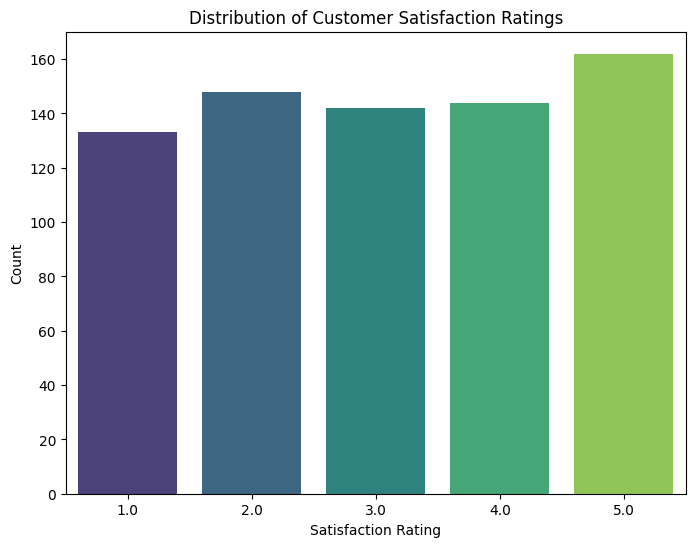

Customer Satisfaction Rating
5.0    0.222222
2.0    0.203018
4.0    0.197531
3.0    0.194787
1.0    0.182442
Name: proportion, dtype: float64


In [ ]:
# In your new EDA section
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Satisfaction Rating', data=data_processed, palette='viridis')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()

print(data_processed['Customer Satisfaction Rating'].value_counts(normalize=True))

2. Feature vs. Target Analysis

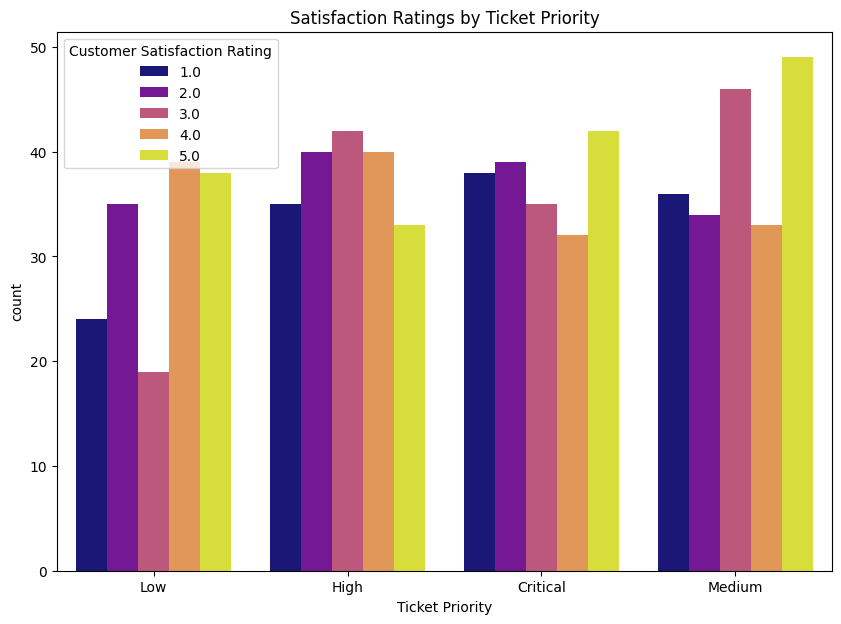

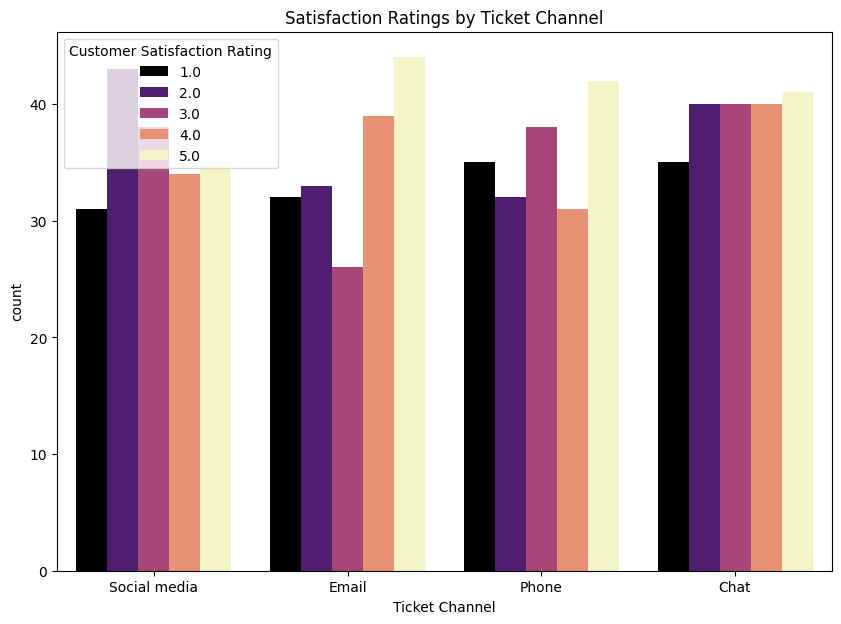

In [ ]:
# Example for 'Ticket Priority' vs. Satisfaction
plt.figure(figsize=(10, 7))
sns.countplot(x='Ticket Priority', hue='Customer Satisfaction Rating', data=data_processed, palette='plasma')
plt.title('Satisfaction Ratings by Ticket Priority')
plt.show()

# Example for 'Ticket Channel' vs. Satisfaction
plt.figure(figsize=(10, 7))
sns.countplot(x='Ticket Channel', hue='Customer Satisfaction Rating', data=data_processed, palette='magma')
plt.title('Satisfaction Ratings by Ticket Channel')
plt.show()

3. Distribution of Customer Age

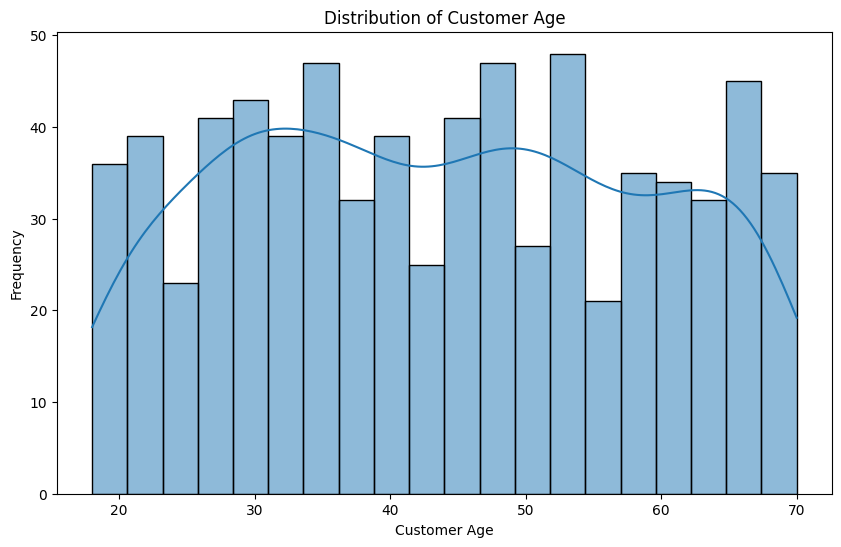

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_processed['Customer Age'], kde=True, bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

4. Distribution of Customer Gender

/tmp/ipython-input-2614202411.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Remove legend as hue is the same as x


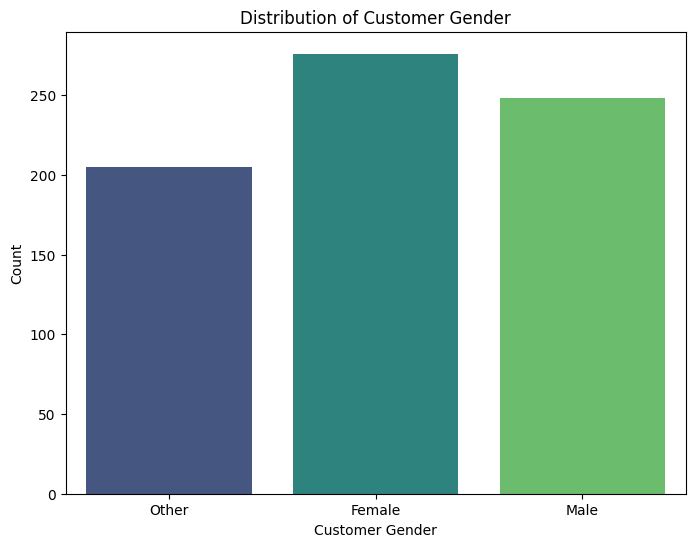

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Gender', data=data_processed, hue='Customer Gender', palette='viridis')
plt.title('Distribution of Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.legend().remove() # Remove legend as hue is the same as x
plt.show()

5. Distribution of Product Purchased

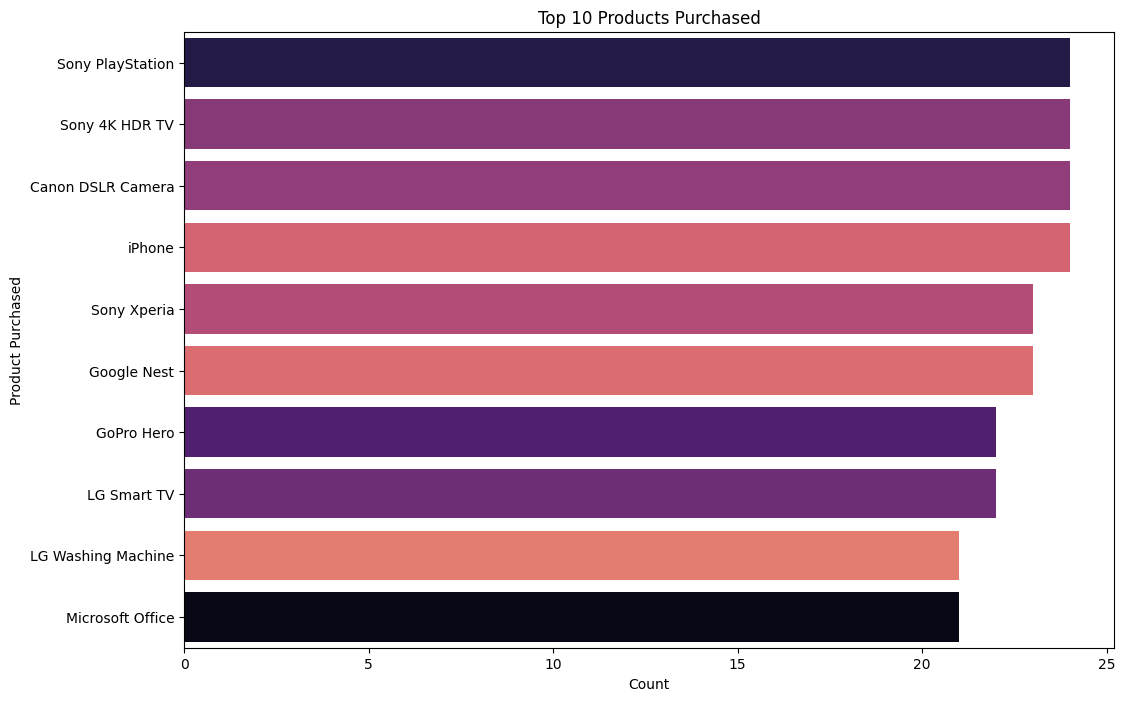

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Product Purchased', data=data_processed, order=data_processed['Product Purchased'].value_counts().index[:10], hue='Product Purchased', palette='magma', legend=False)
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product Purchased')
plt.show()

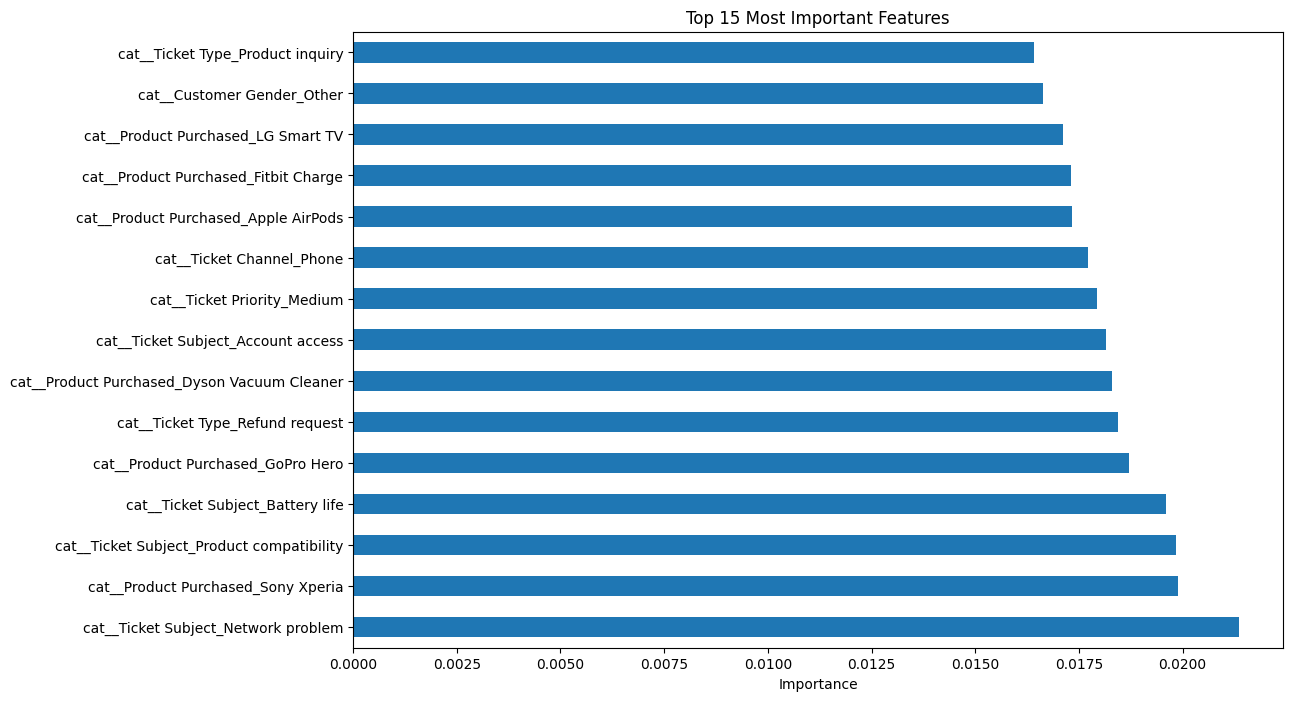

In [ ]:
# After training your best model (e.g., the tuned RandomForest)
# Get feature names from the preprocessor
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_model.named_steps['classifier'].feature_importances_

# Create a pandas series for easy plotting
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feat_importances.head(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance')
plt.show()